In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import cv2

%matplotlib notebook

### ABA Variant

### BAB Variant

In [2]:
def binary_vertices(rank):
    return list(itertools.product([0,1], repeat=rank))

def boundary_vertices(boundary_dims):
    '''Determines the boundary vertices based on the boundary dimensions
    
        Keyword arguments:
        boundary_dims -- tuple/array of integers specifying the boundary limits for the vertices
    '''
    
    return (boundary_dims-1)*binary_vertices(rank=len(boundary_dims))

In [31]:
def perpendicular_vertices(b_ver):
    p_ver = []
    
    for v1 in b_ver:
        for v2 in b_ver:
            if np.sum(np.logical_xor(v1,v2)) == 1 and [v2, v1] not in p_ver:
                p_ver.append([v1, v2])
        
    return p_ver

def sutures(b_ver):
    sutures = []
    
    # create cross-sutures
    for v in b_ver:
        t_sut = np.zeros(len(v), dtype=v.dtype)
        
        for i, v_d in enumerate(v):
            if v_d == 0:
                t_sut[i] = 1
            else:
                t_sut[i] = v_d-1
        
        sutures.append([tuple(v), tuple(t_sut)])
    
    # Create parallel-sutures
#     print(perpendicular_vertices(binary_vertices(rank=len(boundary_dims))))
                
    return sutures

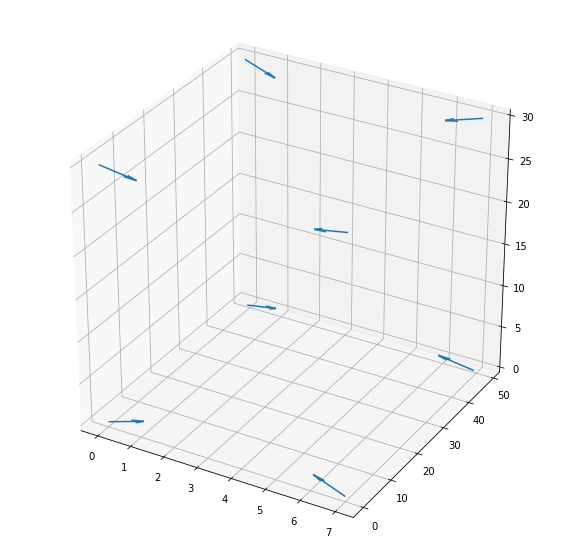

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

boundary_dims = np.array([50,8,31], dtype='uint8')

b_ver = boundary_vertices(boundary_dims)

test = np.array(sutures(b_ver))

for i, st in enumerate(test):
    test[i][1] = test[i][1]-test[i][0]

t2 = test.reshape(test.shape[0], test.shape[1]*test.shape[2])

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

plt.quiver(t2[:,1], t2[:,0], t2[:,2], t2[:,4], t2[:,3], t2[:,5])
plt.show()

In [32]:
perpendicular_vertices(binary_vertices(rank=len(boundary_dims)))

[[(0, 0, 0), (0, 0, 1)],
 [(0, 0, 0), (0, 1, 0)],
 [(0, 0, 0), (1, 0, 0)],
 [(0, 0, 1), (0, 1, 1)],
 [(0, 0, 1), (1, 0, 1)],
 [(0, 1, 0), (0, 1, 1)],
 [(0, 1, 0), (1, 1, 0)],
 [(0, 1, 1), (1, 1, 1)],
 [(1, 0, 0), (1, 0, 1)],
 [(1, 0, 0), (1, 1, 0)],
 [(1, 0, 1), (1, 1, 1)],
 [(1, 1, 0), (1, 1, 1)]]

In [41]:
np.argwhere(np.logical_xor((0, 0, 0), (0, 0, 1))).flatten()

array([2], dtype=int64)